In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

img = cv2.imread('imagenHalo.jpg')
print(img.shape)#array dimension
print(img.size)#total number of pixels
print(img.dtype)#total number of pixels

b,g,r = cv2.split(img)#you can split the image into the three colour channels
b = img[:,:,0]#This is more efficient for accessing to the colour channels
img = cv2.merge((b,g,r))#You can recover the RGB image

plt.imshow(img)
plt.xticks(())
plt.yticks(())

plt.show()

img1=img
img1[:,:,(0,2)]=0
plt.imshow(img1)
plt.xticks(())
plt.yticks(())

plt.show()

img2 = img1+img
img3 = cv2.add(img,img1)

plt.subplot(1,2,1)
plt.imshow(img2)
plt.xticks(())
plt.yticks(())

plt.subplot(1,2,2)
plt.imshow(img3)
plt.xticks(())
plt.yticks(())

plt.show()

cv2.imwrite('imagenHalogreen.jpg', img1)

AttributeError: ignored

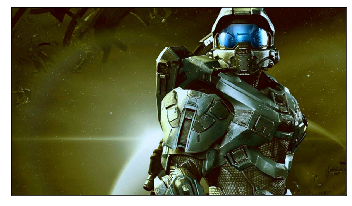

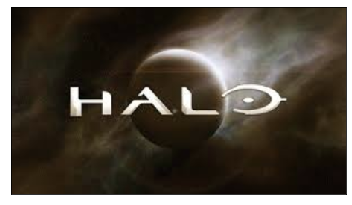

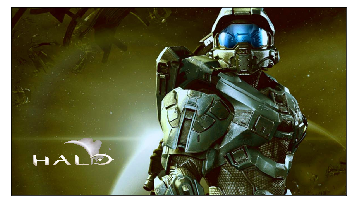

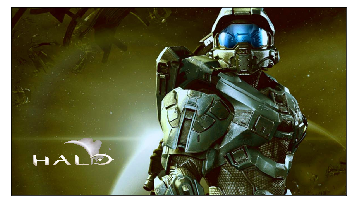

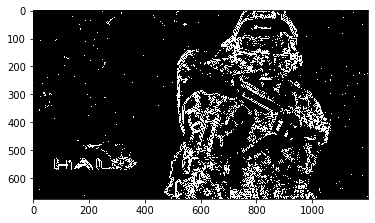

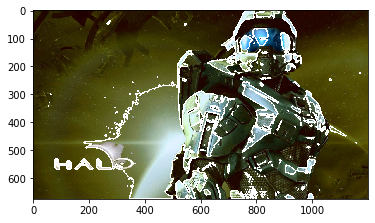

<function matplotlib.pyplot.show>

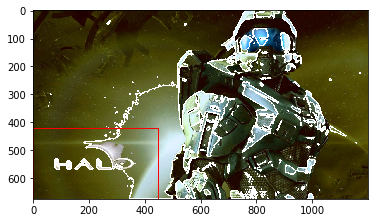

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

#uploaded = files.upload()

img = cv2.imread('imagenHalo.jpg')
plt.imshow(img)
plt.xticks(())
plt.yticks(())
plt.show()

logo = cv2.imread('LogoHalo.jpg')
logo = cv2.resize(logo,None,fx=1.5,fy=1.5)

plt.imshow(logo)
plt.xticks(())
plt.yticks(())
plt.show()

#We create a ROI(region of interest) corresponding to the logo size into the imagenHalo
rows,cols,channels = logo.shape
roi = img[-rows:,0:cols]#Roi es un trozo del fondo de imagenHalo del tamaño del logo

#Now we create the mask of logo and its inverse mask (we take out the dark background)
logogray = cv2.cvtColor(logo,cv2.COLOR_RGB2GRAY)
ret,mask = cv2.threshold(logogray,150, 255,cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

#Now we black-out the area of logo in the ROI of imgagenHalo
img_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)#Al roi le sumamos el logo pero en negro

#We take only region of logo from logo image
logo_fg = cv2.bitwise_and(logo,logo,mask = mask)#De la imagen del logo nos quedamos solo con las letras

#Put logo in ROI and modify the main image
dst = cv2.add(img_bg,logo_fg)
img[-rows:,0:cols] = dst#Sobreescribimos el roi con el logo a la imagen de fondo

plt.imshow(img)
plt.xticks(())
plt.yticks(())
plt.show()

kernel = np.ones((5,5),np.uint8)
img[-rows:,0:cols] = dst#Sobreescribimos el roi con el logo a la imagen de fondo

plt.imshow(img)
plt.xticks(())
plt.yticks(())
plt.show()

imgray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
imgray = cv2.blur(imgray,(5,5))
edges = cv2.Laplacian(imgray,cv2.CV_64F)
edges = np.abs(edges)
ret,edges = cv2.threshold(edges,5, 255,cv2.THRESH_BINARY)
plt.imshow(edges,cmap='gray')
plt.show()

ret,imgbin = cv2.threshold(imgray,100, 255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(imgbin,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
imgcontours = cv2.drawContours(img, contours, -1, (255,255,255), 3)
plt.imshow(imgcontours)
plt.show()

img_temp = img
res = cv2.matchTemplate(img_temp,logo,cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
bottom_right = (top_left[0] + logo.shape[1], top_left[1] + logo.shape[0])
cv2.rectangle(img_temp,top_left, bottom_right, 255, 2)
plt.imshow(img_temp)
plt.show

In [3]:
help (cv2.matchTemplate)

Help on built-in function matchTemplate:

matchTemplate(...)
    matchTemplate(image, templ, method[, result[, mask]]) -> result
    .   @brief Compares a template against overlapped image regions.
    .   
    .   The function slides through image , compares the overlapped patches of size \f$w \times h\f$ against
    .   templ using the specified method and stores the comparison results in result . Here are the formulae
    .   for the available comparison methods ( \f$I\f$ denotes image, \f$T\f$ template, \f$R\f$ result ). The summation
    .   is done over template and/or the image patch: \f$x' = 0...w-1, y' = 0...h-1\f$
    .   
    .   After the function finishes the comparison, the best matches can be found as global minimums (when
    .   #TM_SQDIFF was used) or maximums (when #TM_CCORR or #TM_CCOEFF was used) using the
    .   #minMaxLoc function. In case of a color image, template summation in the numerator and each sum in
    .   the denominator is done over all of the channe